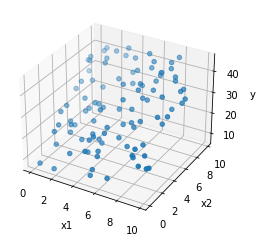

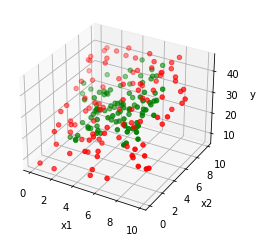

coef= [0.48722691 3.11859271]
intercept= 9.696079632921208
ssr= 821.3340645492973
R2 =  0.9082978819392231


ValueError: Expected 2D array, got 1D array instead:
array=[2.61612134 5.11821625].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

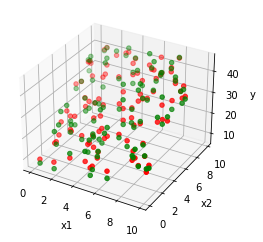

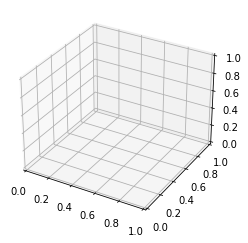

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
import sklearn
from scipy.interpolate import CubicSpline, UnivariateSpline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

d=np.zeros((100,4))
d[:,3]=default_rng(0).normal(0,3,100)
d[:,2]=default_rng(1).uniform(0,10,100)
d[:,1]=default_rng(2).uniform(0,10,100)
d[:,0]=10+0.5*d[:,1]+3*d[:,2]+d[:,3]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(d[:,1],d[:,2],d[:,0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
f=np.zeros((100,4))
for i in range(4):
	f[:,i]=pd.Series(d[:,i]).rolling(window=3,center=True).mean()
ax.scatter(d[:,1],d[:,2],d[:,0],c='r')
ax.scatter(f[:,1],f[:,2],f[:,0],c='g')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

r = LinearRegression().fit(d[:,1:3], d[:,0])
print("coef=",r.coef_)
print("intercept=",r.intercept_)
y_pred = r.predict(d[:,1:3])
sklearn.metrics.mean_squared_error(d[:,0], y_pred)
print("ssr=",sklearn.metrics.mean_squared_error(d[:,0], y_pred)*100)    
print('R2 = ', r.score(d[:,1:3], d[:,0]))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(d[:,1],d[:,2],d[:,0],c='g')
ax.scatter(d[:,1],d[:,2],y_pred,c='r')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(100):
    if(d[i,0]>r.predict(d[i,1:3])):
        ax.scatter(d[i,1],d[i,2],d[i,0],c='b')
    else:
        ax.scatter(d[i,1],d[i,2],d[i,0],c='g')
ax.plot_surface(d[:,1],d[:,2],d[:,0],c='r')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')